# Compiler Benchmark using Quantum Circuit Unoptimization

## Contents
[1. Import](#1-import)

[2. Input circuit](#2-input-circuit)

[3. Quantum circuit unoptimization](#3-quantum-circuit-unoptimization)

[4. Compiler benchmark](#4-compiler-benchmark)

[5. Check depth ratios](#5-check-depth-ratios)

### 1. Import

In [7]:
from unopt.calc_tool import *
from unopt.circuit_ops import *
from unopt.decomp import *
from unopt.converter import *
from unopt.recipe import *
from unopt.generator import *
from qulacsvis import circuit_drawer
from unopt.benchmarking import *

### 2. Input circuit

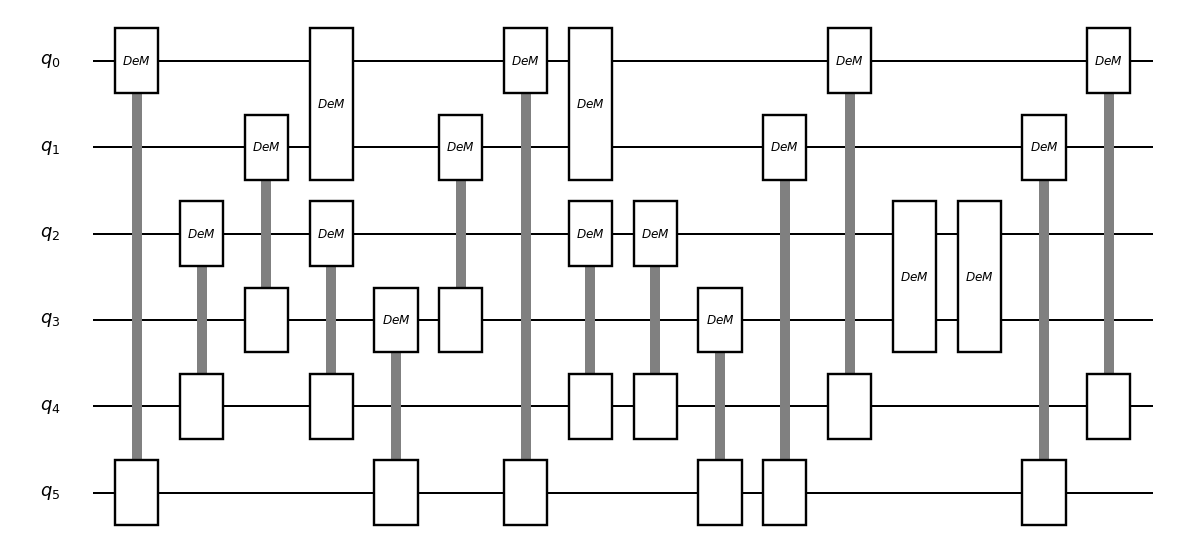

In [8]:
nqubits = 6
depth = 6
k = nqubits ** 2 #unopt_iteration_count
circuit_initial = generate_random_qc(nqubits=nqubits, depth=depth)
circuit_drawer(circuit_initial,'mpl')

### 3. Quantum circuit unoptimization

In [9]:
circuit_input = circuit_initial.copy()
state = operation_to_zero_state(circuit_initial)
circuit_unopted = unoptimization(circuit_input, iteration=k, pair_select_method='concatenated')[0]

Unoptimization:   0%|          | 0/36 [00:00<?, ?it/s]

### 4. Compiler benchmark

In [10]:
# Qiskit
circuit_qiskit_U = qulacs_to_qiskit(circuit_initial)
circuit_qiskit_V = qulacs_to_qiskit(circuit_unopted)
result_qiskit = qiskit_comp(circuit_qiskit_U,circuit_qiskit_V,state)

# Pytket
circuit_tket_U = qulacs_to_tket(circuit_initial)
circuit_tket_V = qulacs_to_tket(circuit_unopted)
result_tket = tket_comp(circuit_tket_U,circuit_tket_V,state)

### 5. Check depth ratios

In [11]:
print('r_unopt',result_qiskit.at['qiskit_v','Depth'] / result_qiskit.at['qiskit_u','Depth'])
print('r_opt(Qiskit)',result_qiskit.at['qiskit_v_compiled','Depth'] / result_qiskit.at['qiskit_u','Depth'])
result_qiskit

r_unopt 38.62162162162162
r_opt(Qiskit) 38.45945945945946


,Depth,Total gates,CNOT gates
qiskit_u_bef_decomp,6,18,{'unitary': 18}
qiskit_u,37,168,54
qiskit_v_bef_decomp,489,509,{'unitary': 509}
qiskit_v,1429,2327,774
qiskit_v_compiled,1423,2273,756


In [12]:
print('r_unopt(Pytket)',result_tket.at['tket_v','Depth'] / result_qiskit.at['qiskit_u','Depth'])
print('r_opt(Pytket)',result_tket.at['tket_v_compiled','Depth'] / result_qiskit.at['qiskit_u','Depth'])
result_tket

r_unopt(Pytket) 38.5945945945946
r_opt(Pytket) 33.486486486486484


,Depth,Total gates,CNOT gates
tket_u_bef_decomp,6,18,0
tket_u,37,168,54
tket_v_bef_decomp,489,509,0
tket_v,1428,2298,774
tket_v_compiled,1239,1830,671
